# Distributions in details

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, poisson, norm, expon, bernoulli, chi2

Normal: The distribution of heights for 1000 adults, with an average height of 170 cm and a standard deviation of 10 cm. The bell-shaped curve is characteristic of the Normal distribution.

In [ ]:
# Normal
mu_height, sigma_height = 170, 10
heights_data = norm.rvs(mu_height, sigma_height, size=1000)

In [ ]:
heights_data

Text(0, 0.5, 'Frequency')

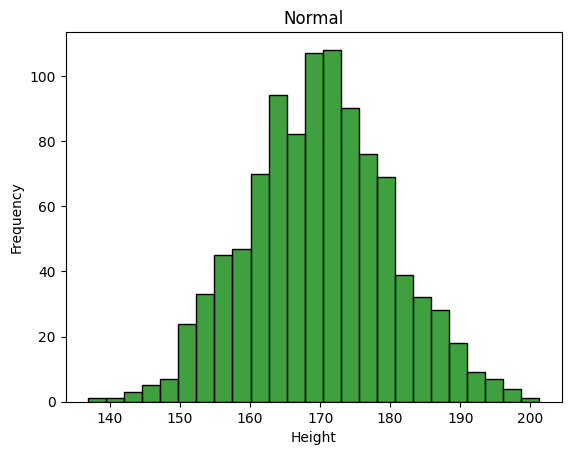

In [ ]:

sns.histplot(heights_data, kde=False, color='green')
plt.title('Normal')
plt.xlabel('Height')
plt.ylabel('Frequency')


In [ ]:
def z_test(sample_mean, pop_mean, std_dev, sample_size):
  """
  Perform a Z-test for a single sample.

  :param sample_mean: Mean of the sample
  :param pop_mean: Mean of the population
  :param std_dev: Standard deviation of the population
  :param sample_size: Size of the sample
  :return: p-value
  """
  standard_error = std_dev / (sample_size ** 0.5)
  z_score = (sample_mean - pop_mean) / standard_error
  p_value = 2 * (1 - norm.cdf(abs(z_score)))
  return p_value

def is_significant(alpha, p_value):
  """
  Check if the result is statistically significant.

  :param p_value: p-value from the test
  :return: True if significant, False otherwise
  """
  return p_value < alpha

Suppose we have a sample with a mean weight of 80 kg, and we know the population mean is 75 kg with a standard deviation of 10 kg. The sample size is 30. We want to test if our sample mean is significantly different from the population mean.

In [ ]:
p_value = z_test(sample_mean=80, pop_mean=75, std_dev=10, sample_size=30)
print("P-Value:", p_value)
print("Is Significant:", is_significant(0.05,p_value))

P-Value: 0.0061698993205441255
Is Significant: True


In [ ]:
#answer

In [ ]:
# X - mu = 0
# X = mu

#X != mu

Exponential: The duration of 1000 customer service calls, with an average call duration of 8 minutes. The distribution of call durations fits the Exponential distribution.

Therefore, we reject the null hypothesis

Text(0, 0.5, 'Frequency')

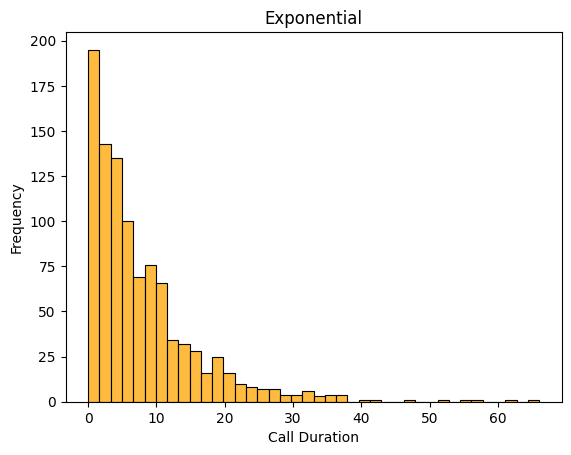

In [ ]:
#Exponential
lambda_call = 1/8  # Average duration is 8 minutes
call_duration_data = expon.rvs(scale=1/lambda_call, size=1000)

sns.histplot(call_duration_data, kde=False, color='orange')
plt.title('Exponential')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')

In [ ]:
def exponential_test(sample_mean, hypothesized_mean):
  """
  Perform a test for a single sample with an exponential distribution.

  :param sample_mean: Mean of the sample
  :param hypothesized_mean: Hypothesized mean of the population
  :return: p-value
  """
  lambda_0 = 1 / hypothesized_mean
  test_statistic = 2 * sample_mean * lambda_0
  # Exponential test is usually a one-sided test
  p_value = chi2.sf(test_statistic, df=2)
  return p_value

In [ ]:
def is_significant(alpha, p_value):
  standard_error = std_dev / (sample_size ** 0.5)
  z_score = (sample_mean - pop_mean) / standard_error
  p_value = 2 * (1 - norm.cdf(abs(z_score)))
  return p_value

In [ ]:
p_value = exponential_test(sample_mean=120, hypothesized_mean=100)
print("P-Value:", p_value)
print("Is Significant:", is_significant(0.05,p_value))

P-Value: 0.3011942119122021
Is Significant: False


Let's say we have a sample from a process we believe to be exponentially distributed. The sample mean is 120 minutes, and we want to test if this significantly differs from a hypothesized mean of 100 minutes.

In [ ]:
#answer

In [ ]:
#Fail to reject

Poisson: the number of visitors to a website each hour over a 24-hour period, with an average of 10 visitors per hour. The distribution of visitor counts per hour aligns with the Poisson distribution.

Text(0, 0.5, 'Frequency')

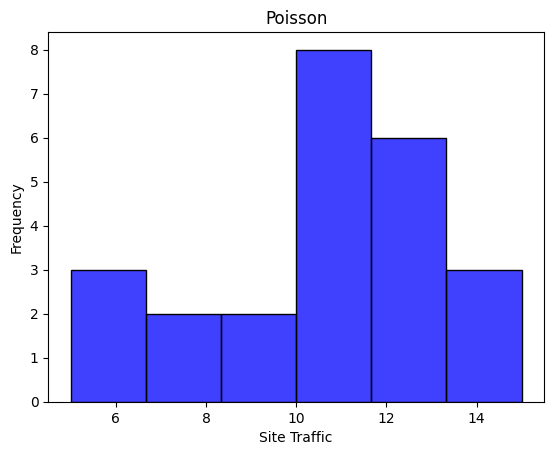

In [ ]:
# Poisson
lambda_visitors = 10  # Average number of visitors per hour
website_traffic_data = poisson.rvs(mu=lambda_visitors, size=24)  # 24 hours

sns.histplot(website_traffic_data, kde=False, color='blue')
plt.title('Poisson')
plt.xlabel('Site Traffic')
plt.ylabel('Frequency')

In [ ]:
def poisson_test(sample_mean, hypothesized_mean, sample_size):
        """
        Perform a test for a single sample with a Poisson distribution.

        :param sample_mean: Mean of the sample
        :param hypothesized_mean: Hypothesized mean of the population
        :param sample_size: Size of the sample
        :return: p-value
        """
        test_statistic = 2 * sample_size * (sample_mean * np.log(sample_mean / hypothesized_mean) - sample_mean + hypothesized_mean)
        # Poisson test usually results in a chi-squared distribution
        p_value = chi2.sf(test_statistic, df=1)
        return p_value

In [ ]:
# Calculate the t-statistic
# t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
# Calculate the p-value
# p_value = 2 * stats.t.sf(np.abs(t_statistic), df=sample_size-1)

Suppose we have a sample data where the average number of events per day is 10. We want to test if this significantly differs from a hypothesized average of 8 events per day. The sample size, in this case, is the number of days we observed.

In [ ]:
p_value = poisson_test(sample_mean=10, hypothesized_mean=8, sample_size=30)
print("P-Value:", p_value)
print("Is Significant:", is_significant(0.05,p_value))

P-Value: 0.0001942264511066646
Is Significant: True


Binomial: the number of defective products found in 50 inspections, with each product having a 5% chance of being defective. The distribution of the number of defectives across 1000 inspections follows the Binomial distribution.

Text(0, 0.5, 'Frequency')

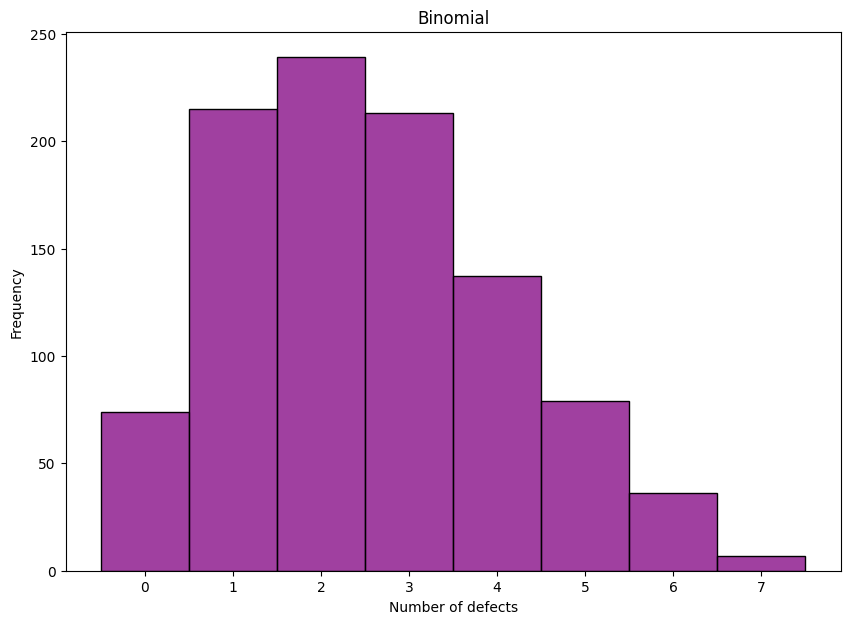

In [ ]:
# Binomial
n_products, p_defective = 50, 0.05
quality_control_data = binom.rvs(n_products, p_defective, size=1000)

fig, axs = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(quality_control_data, kde=False, ax=axs, discrete=True, color='purple')
axs.set_title('Binomial')
axs.set_xlabel('Number of defects')
axs.set_ylabel('Frequency')

In [ ]:
def binomial_test(number_of_successes, sample_size, hypothesized_probability):
        """
        Perform a test for a single sample with a Binomial distribution.

        :param number_of_successes: Number of successes in the sample
        :param sample_size: Size of the sample
        :param hypothesized_probability: Hypothesized probability of success
        :return: p-value
        """
        test_statistic = (number_of_successes - sample_size * hypothesized_probability) / np.sqrt(sample_size * hypothesized_probability * (1 - hypothesized_probability))
        p_value = 2 * norm.cdf(-np.abs(test_statistic))
        return p_value

Let's say we conducted 100 trials (e.g., flipping a coin), and we observed 60 successes (e.g., landing on heads). We want to test if the coin is biased towards heads, assuming the hypothesized probability of success (heads) is 0.5 (fair coin).

In [ ]:
p_value = binomial_test(number_of_successes=60, sample_size=100, hypothesized_probability=0.5)
print("P-Value:", p_value)
print("Is Significant:", is_significant(0.05,p_value))

P-Value: 0.04550026389635839
Is Significant: True


Bernoulli: the outcomes of 1000 ad views, with each view having a 20% chance of resulting in a click. The distribution of clicks (1) and no-clicks (0) fits the Bernoulli distribution.

Text(0, 0.5, 'Frequency')

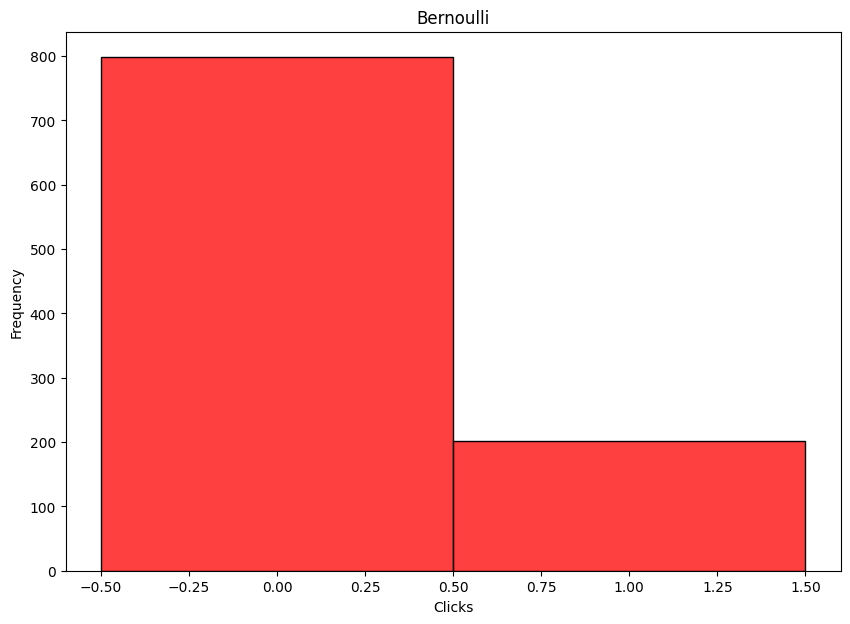

In [ ]:
# Bernoulli
p_click = 0.2  # Probability of click
click_data = bernoulli.rvs(p_click, size=1000)

fig, axs = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(click_data, kde=False, ax=axs, discrete=True, color='red')
axs.set_title('Bernoulli')
axs.set_xlabel('Clicks')
axs.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

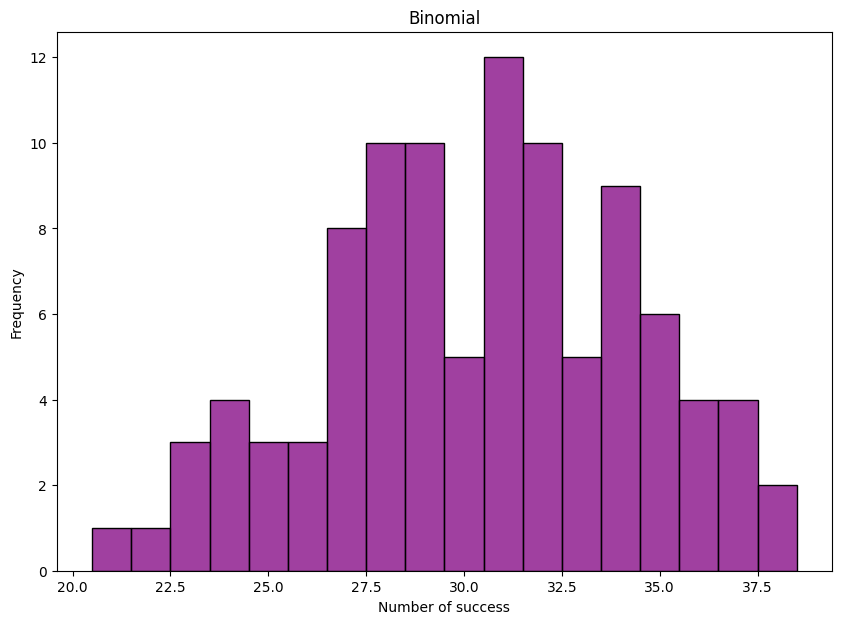

In [ ]:
success, p_s = 60, 0.5
quality_control_data = binom.rvs(success, p_s, size=100)

#fig, axs = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(quality_control_data, kde=False, ax=axs, discrete=True, color='purple')
axs.set_title('Binomial')
axs.set_xlabel('Number of success')
axs.set_ylabel('Frequency')

# Hypothesis Testing

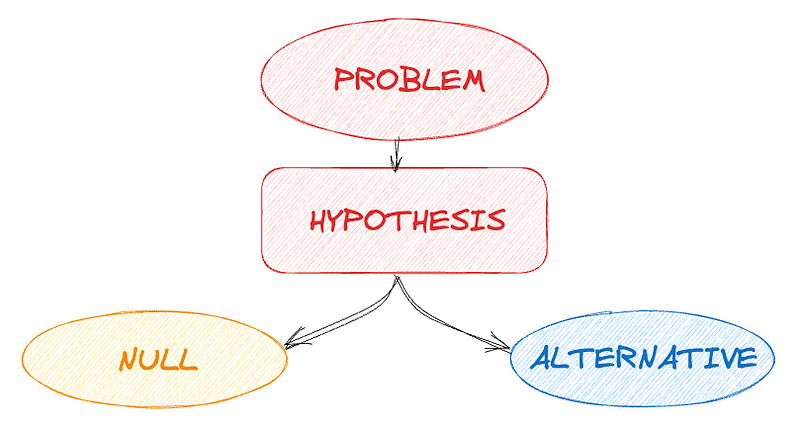

# Hypothesis Testing

Hypothesis testing is a statistical method used to make decisions about the properties of a population based on a sample of data. It involves making an initial assumption (the null hypothesis), collecting data, and then determining whether the data provides enough evidence to reject that assumption in favor of an alternative hypothesis.

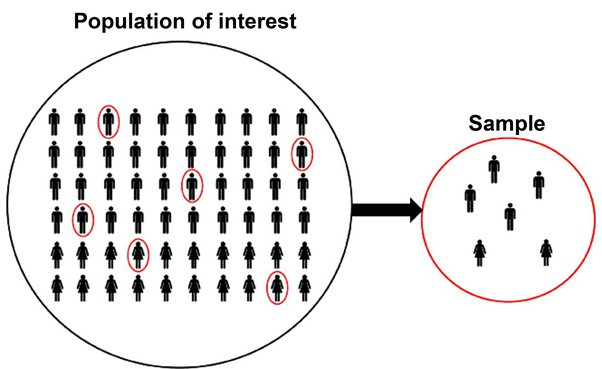

# Introduction to Experimental Design - Reference Canvas

- The Scientific Method -(The role it plays in avoiding ambiguity) https://www.sciencebuddies.org/science-fair-projects/science-fair/steps-of-the-scientific-method
- Effect Size - https://www.scribbr.com/statistics/effect-size/, https://colab.research.google.com/drive/1A1VMYIMVRvx3Vm7Pa6JR0nZYRB-BJije#scrollTo=7zr-peGXL5WQ

- Spurious Correlations - https://www.datasciencecentral.com/spurious-correlations-15-examples/
- One and Two Sample T-Tests

One-sample t-test
A one-sample t-test is used to test whether the mean of a single population is equal to a specified value. For example, you might want to check if the average height of students in your class is 170 cm, or if the mean score of a test is 50%. To perform a one-sample t-test, you need a random sample from the population, and you need to know or assume the standard deviation of the population. The null hypothesis is that the population mean is equal to the specified value, and the alternative hypothesis is that it is not.

Two-sample t-test
A two-sample t-test is used to test whether the means of two independent populations are equal or not. For example, you might want to compare the average salaries of male and female employees, or the mean blood pressure of smokers and non-smokers. To perform a two-sample t-test, you need two random samples from the populations, and you need to know or assume the standard deviations of the populations. The null hypothesis is that the population means are equal, and the alternative hypothesis is that they are not.



#Steps in Hypothesis Testing

1. **State the Hypotheses:** Formulate the null hypothesis (H0) and the alternative hypothesis (H1).

2. **Choose the Significance Level (α):** Decide the significance level (typically 0.05 or 5%).

3. **Select the Appropriate Test:** Choose a statistical test based on the data type and study design.

4. **Collect and Prepare Data:** Gather and preprocess the data required for the test.

5. **Perform the Test:** Compute the test statistic and p-value.

6. **Make a Decision:** Compare the p-value to the significance level to accept or reject the null hypothesis.

7. **Draw a Conclusion:** Summarize the results and their implications.

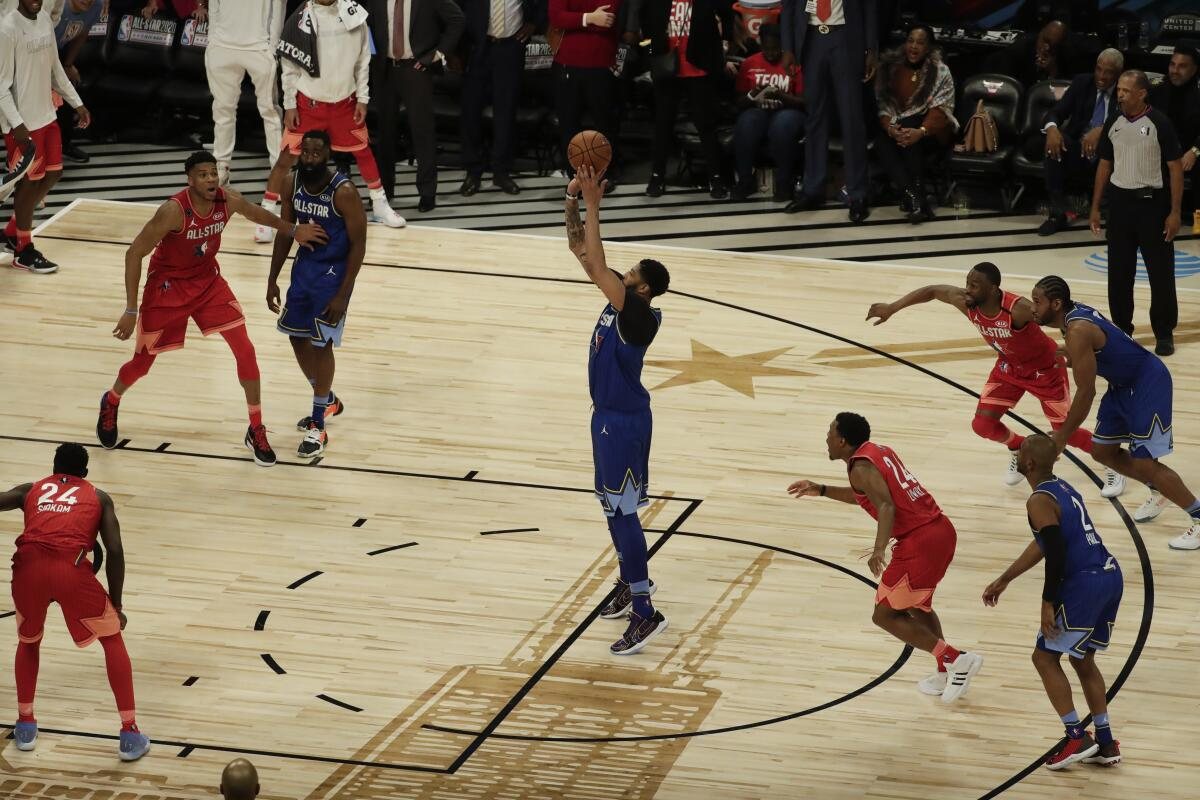

# Basketball Example
Let's say before practicing, you made 50 out of 100 free throws (50%). After practicing, you make 60 out of 100 free throws (60%).

**Null Hypothesis (H0):** Practicing has no effect; your shooting percentage is still 50%.

**Alternative Hypothesis (H1):** Practicing helped; your shooting percentage is more than 50%.

You set your significance level at 5%.

You calculate the p-value based on your new shooting percentage (60%) and compare it to the old percentage (50%).

If the p-value is less than 5%, you conclude practicing likely helped. If it's more, you conclude there's no strong evidence that practicing made a difference.

In Simple Terms

Hypothesis testing is like trying to see if your practice paid off by comparing your new performance to your old one. If the difference is big enough according to your rules (significance level), you believe practicing helped. If not, you think it didn’t make a big difference.

#Types of Hypothesis Tests


*Question: When is it appropriate to use each of these tests? *

**Z-Test:** Used for large sample sizes (n > 30), when the population variance is known.

**T-Test:** Used for smaller sample sizes (n < 30) or when the population variance is unknown.

**One-sample t-test:** Compare the sample mean to a known value.

**Two-sample t-test:** Compare the means of two independent samples.

**Paired t-test:** Compare the means of two related samples.

**Chi-Square Test:** Used for categorical data to test the independence of two variables or goodness-of-fit.

**ANOVA (Analysis of Variance):** Used to compare means across three or more groups.

**Non-parametric Tests:** Used when data doesn't follow a normal distribution (e.g., Mann-Whitney U test, Kruskal-Wallis test).






#Z test

This is often used when you want to compare a sample proportion to a known population proportion, and the sample size is large enough to assume that the sampling distribution of the sample proportion is approximately normal.

**Scenario**
Suppose you are a quality control manager at a factory that produces light bulbs. Historically, 5% of the light bulbs produced are defective. You want to test if the current defect rate is different from 5%. You take a random sample of 200 light bulbs and find that 12 of them are defective.

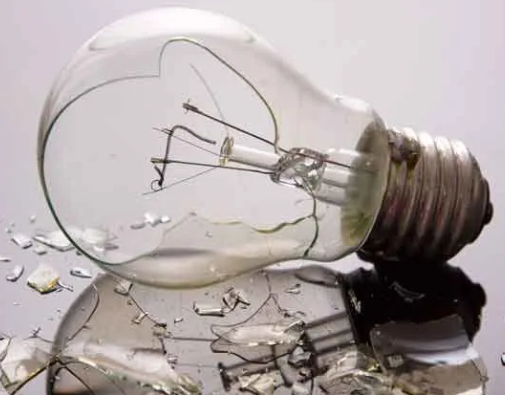

**Steps**

1. State the Hypotheses:

Null Hypothesis (H0): The proportion of defective light bulbs is 0.05.
Alternative Hypothesis (H1): The proportion of defective light bulbs is not 0.05.

2. Choose the Significance Level (α):

Typically, α = 0.05.

3. Collect and Prepare Data:

Sample size (n) = 200.
Number of defective light bulbs (x) = 12.
Sample proportion (
𝑝
^
p
^
​
 ) = x / n = 12 / 200 = 0.06.

4. Calculate the Test Statistic:

The Z-test statistic for a proportion is given by:
𝑍
=
𝑝
^
−
𝑝
0
𝑝
0
(
1
−
𝑝
0
)
𝑛
Z=
n
p
0
​
 (1−p
0
​
 )
​

​

p
^
​
 −p
0
​

​


where
𝑝
^
p
^
​
  is the sample proportion,
𝑝
0
p
0
​
  is the population proportion under the null hypothesis, and
𝑛
n is the sample size.

5. Perform the Test:

Calculate the Z-test statistic and p-value.

6. Make a Decision:

Compare the p-value to the significance level.

7. Draw a Conclusion:

Based on the decision, interpret the results.

In [ ]:
import numpy as np
import scipy.stats as stats

# Collect and Prepare Data
n = 200  # sample size
x = 12  # number of defective light bulbs
p0 = 0.05  # population proportion under the null hypothesis, the known population proportion (0.05).
phat = x / n  # sample proportion, the sample proportion calculated as x / n.

# Calculate the Test Statistic
# Z = (phat - p0) / sqrt(p0 * (1 - p0) / n)
z_statistic = (phat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))  #stats.norm.cdf is used to find the cumulative distribution function value for the Z-statistic. The p-value is calculated as twice the tail probability (since it's a two-tailed test).

# Make a Decision
alpha = 0.05  # significance level

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. The proportion of defective light bulbs is significantly different from 0.05.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference from the proportion of 0.05.")

In this example, we performed a Z-test for a single proportion to determine if the proportion of defective light bulbs differs from the known proportion of 5%. By calculating the Z-statistic and p-value, we can make an informed decision about the null hypothesis.

This method is widely used in quality control and other fields where comparing sample proportions to known population proportions is essential.

**Two-Sample T-Test**

Let's perform a two-sample t-test to compare the means of two independent groups. Suppose we have two samples of test scores from two different classes, and we want to test if there is a significant difference between their means.

**Step-by-Step Process**

1. **State the Hypotheses:**

Null Hypothesis (H0): The means of the two groups are equal.
Alternative Hypothesis (H1): The means of the two groups are not equal.

2. **Choose the Significance Level (α):**

Typically, α = 0.05.

3. **Collect and Prepare Data:**
Sample data for two groups.

4. **Perform the Test:**

Use a two-sample t-test to compare the means.

5. **Make a Decision:**

Compare the p-value to the significance level.

6. **Draw a Conclusion:**

Based on the decision, interpret the results.

In [ ]:
import numpy as np
import scipy.stats as stats

# Sample data
class_A_scores = np.array([85, 78, 90, 88, 76, 80, 89, 84, 91, 87])
class_B_scores = np.array([82, 77, 85, 86, 79, 81, 83, 80, 88, 78])

# Step 4: Perform the Test
t_statistic, p_value = stats.ttest_ind(class_A_scores, class_B_scores)

# Step 5: Make a Decision
alpha = 0.05

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the two classes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the two classes.")


**Data:**

class_A_scores and class_B_scores are numpy arrays representing the test scores of two different classes.
Performing the Test:

stats.ttest_ind performs an independent two-sample t-test.

The function returns the t-statistic and the p-value.


**Making a Decision:**

If the p-value is less than the significance level (0.05), we reject the null hypothesis, indicating a significant difference between the means.


If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, indicating no significant difference between the means.


**Conclusion**
Hypothesis testing is a fundamental tool in statistics for making inferences about populations based on sample data. By following the structured process and using appropriate tests, we can draw meaningful conclusions and make data-driven decisions. The example provided demonstrates how to apply a two-sample t-test in Python, a common test used to compare means between two groups.








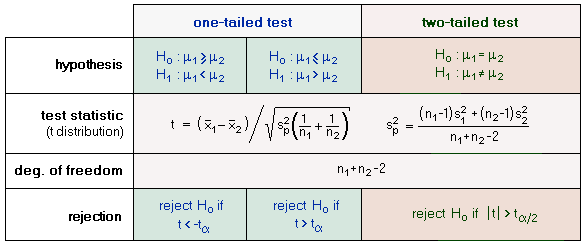

# Type I and Type II Errors

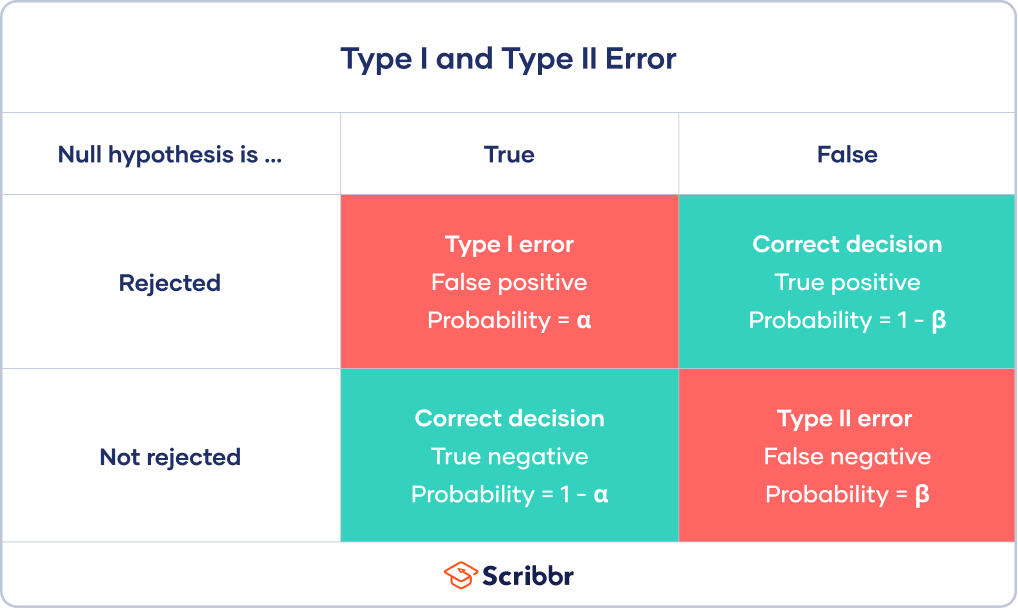

In statistics, a **Type I error is a false positive conclusion**, while a** Type II error is a false negative conclusion.**

Making a statistical decision always involves uncertainties, so the risks of making these errors are unavoidable in hypothesis testing.

The probability of making a **Type I error is the significance level**, or alpha (α), while the probability of making a **Type II error is beta (β)**.

These risks can be minimized through careful planning in your study design.

**Example: Type I vs Type II error**

You decide to get tested for COVID-19 based on mild symptoms. There are two errors that could potentially occur:

Type I error (false positive): the test result says you have coronavirus, but you actually don’t.

Type II error (false negative): the test result says you don’t have coronavirus, but you actually do.

**Understanding the Basics**

1. What is a null hypothesis (H0) and why is it important in hypothesis testing?

2. What is an alternative hypothesis (H1) and how does it differ from the null hypothesis?

3. Why do we set a significance level (α) before conducting a hypothesis test?

4. What is a p-value and what does it represent in the context of hypothesis testing?

5. Explain the difference between a one-tailed and a two-tailed test. When would you use each?

**Types of Tests**

1. When would you use a Z-test instead of a T-test?

2. Describe a scenario where you would use an ANOVA test. What are you trying to determine?

3. What are the assumptions underlying the Chi-Square test for independence?

4. How does a paired T-test differ from an independent T-test, and when would you use it?

5. What is a non-parametric test and why might you use one instead of a parametric test?


**Analyzing and Interpreting Results**

1. What steps would you take if your hypothesis test results in a p-value very close to the significance level?

2. Explain Type I and Type II errors in hypothesis testing. Why is it important to understand them?

3. If you fail to reject the null hypothesis, what does this mean about your data and hypothesis?

4. How would you explain the results of a hypothesis test to someone without a statistical background?

5. What are confidence intervals, and how do they relate to hypothesis testing?
Critical Thinking

6. How does sample size affect the power of a hypothesis test?

7. What are some common pitfalls or mistakes to avoid when conducting hypothesis tests?

8. Discuss how multiple hypothesis testing can lead to false positives and how to mitigate this issue.

9. Why is it important to check the assumptions of a hypothesis test before applying it?

10. In what situations might hypothesis testing be inappropriate or misleading?


**Real-World Scenarios**

A marketing team claims that their new advertisement campaign has increased sales. How would you test this claim?

How would you design a hypothesis test to compare the average GPA of students from two different universities?

Describe how you would test whether a new website design has improved user engagement compared to the old design.

If a restaurant wants to know if changing its menu has affected customer satisfaction, how would you set up a hypothesis test?

A city council believes that installing new streetlights has reduced crime rates. How would you test this hypothesis?

HYPOTHESIS TESTING PRACTICE QUESTIONS: https://docs.google.com/document/d/1mtjESfeMncfE_g5dKICdtrqA2eKbLSYcnkygRuQSFKo/edit#heading=h.7qjsp6kjtw8g